In [1]:
## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Load Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies.csv


In [5]:
movies = pd.read_csv('my_movies.csv')

In [6]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [7]:
movies.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [9]:
movies.shape

(10, 15)

In [10]:
movies.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [11]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
movies.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [13]:
## EDA

In [14]:
# Data Visualization

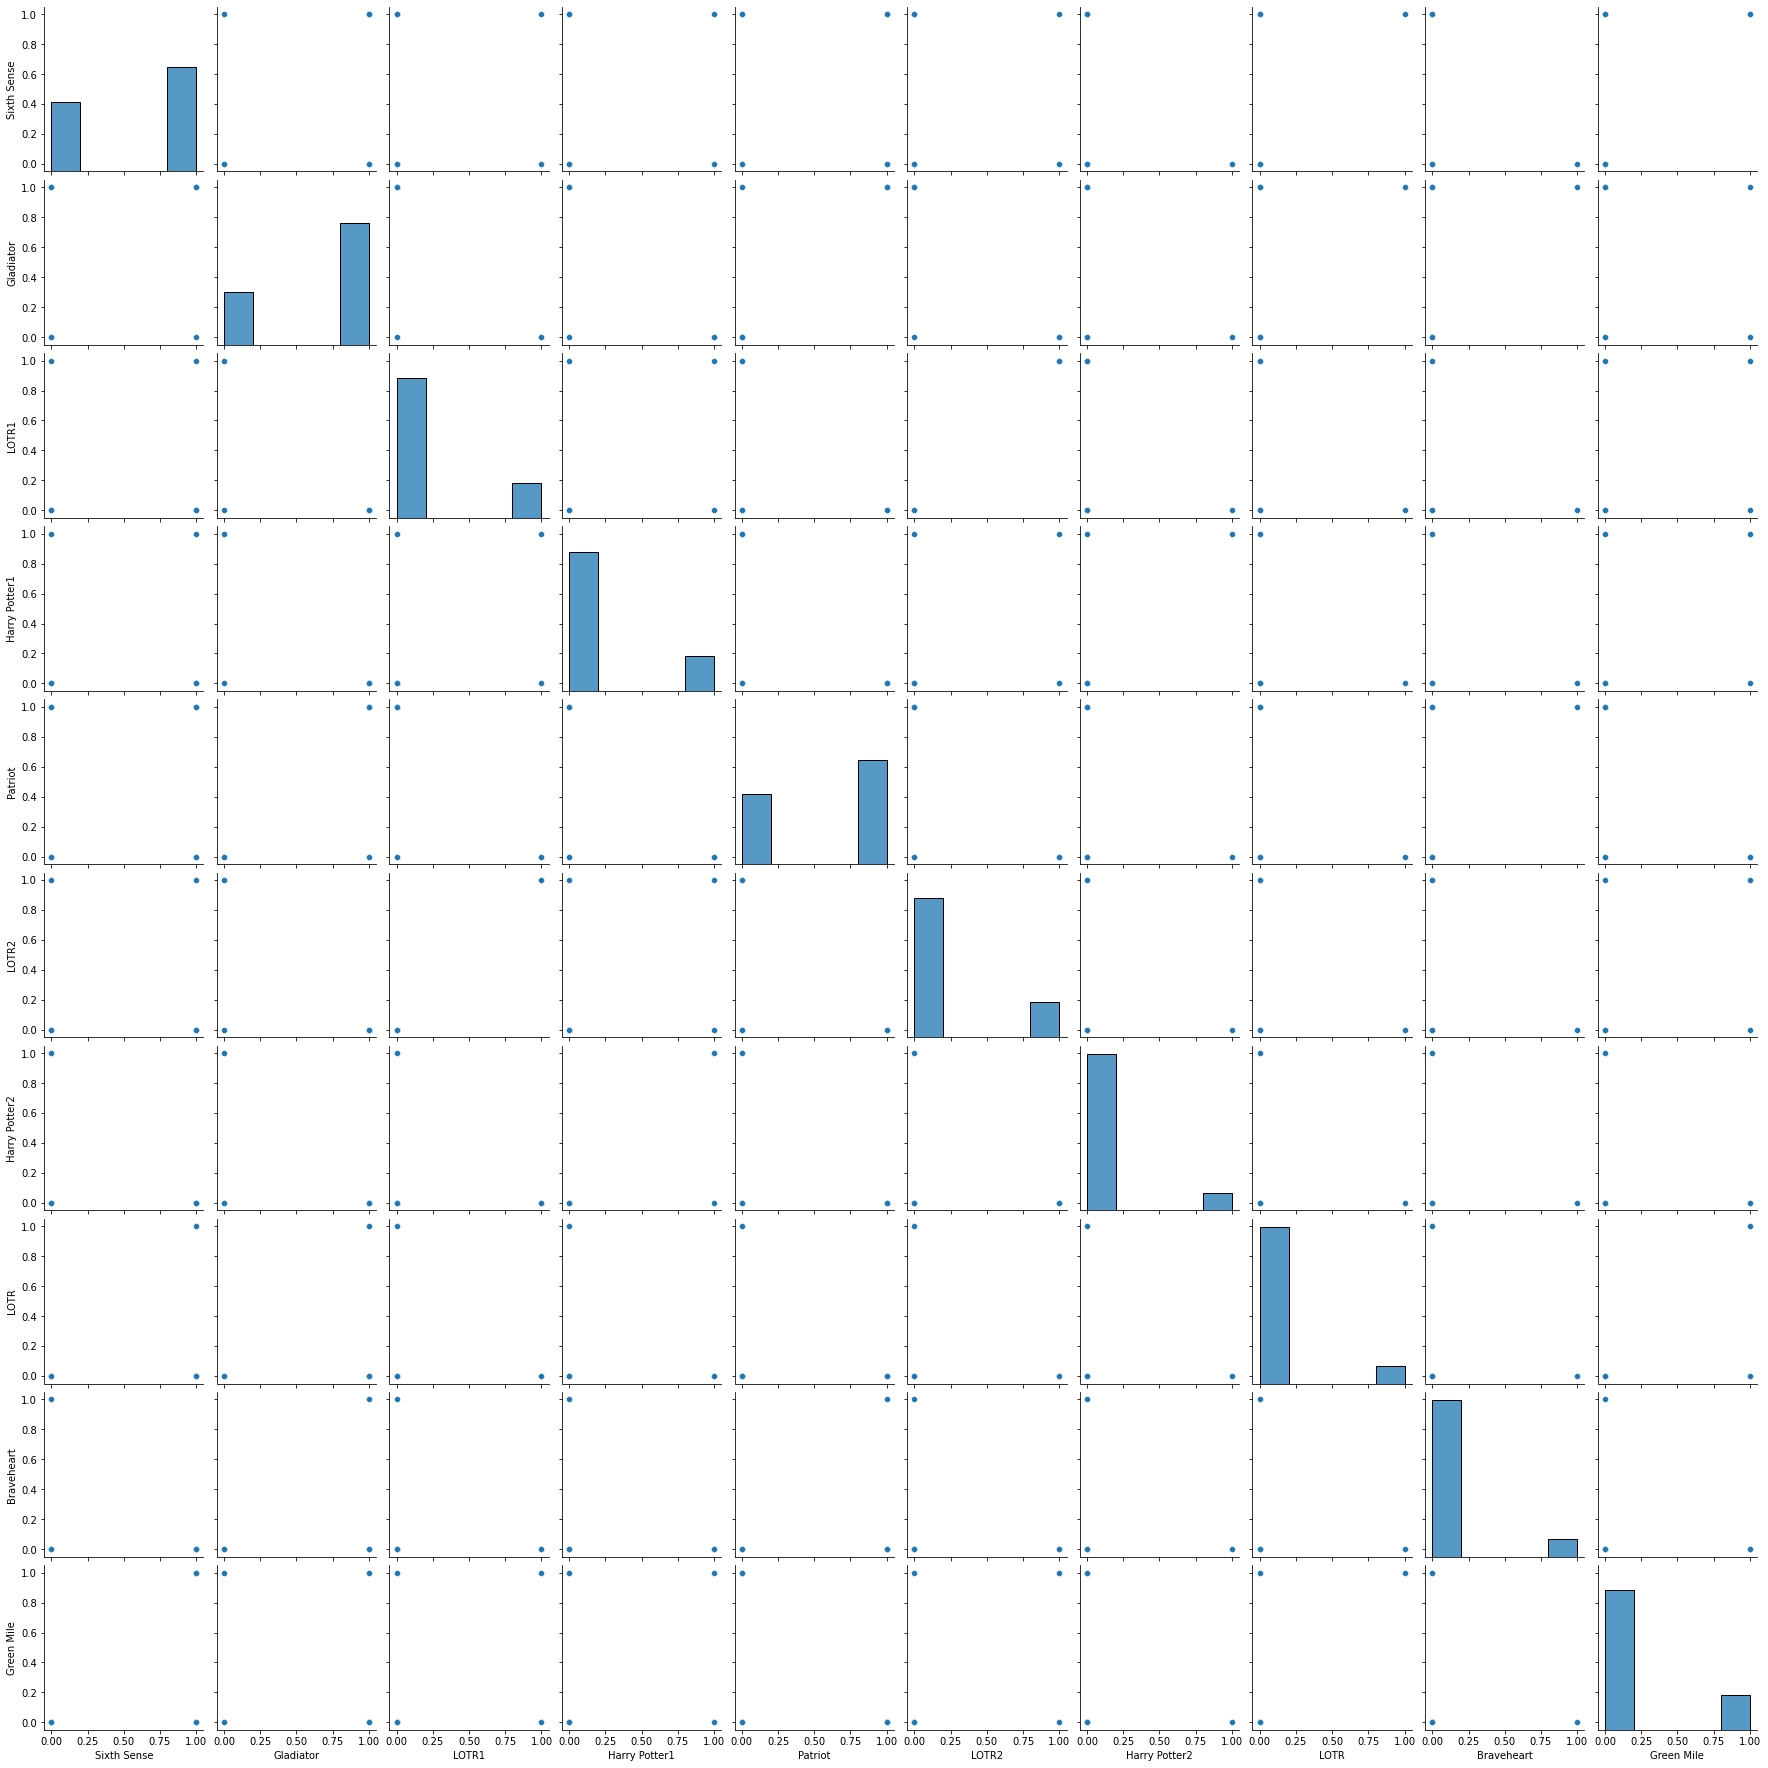

In [15]:
sns.pairplot(movies)

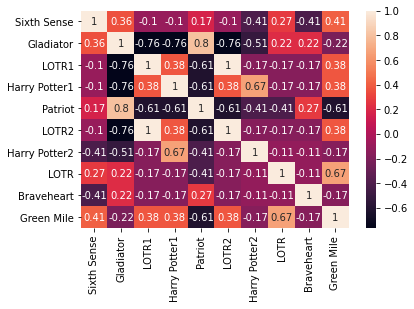

In [16]:
sns.heatmap(movies.corr(), annot = True)

In [17]:
# Preprocessing

In [18]:
df = pd.get_dummies(movies)

In [20]:
df.head(20)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [21]:
## Association Rule

In [22]:
# Apriori Algorithm

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [24]:
frequent_itemsets = apriori(df, min_support= 0.1, use_colnames= True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V5_LOTR2, Green Mile, V4_Green Mile..."
1393,0.1,"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre..."
1394,0.1,"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre..."
1395,0.1,"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre..."


In [25]:
rules = association_rules(frequent_itemsets, metric= 'lift', min_threshold= 0.7)

In [26]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V3_Harry Potter1),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [29]:
rules.sort_values('lift', ascending= False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(LOTR2, Harry Potter1, Sixth Sense, V3_Harry P...","(V5_LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(Harry Potter1, Sixth Sense, V4_Green Mile)","(LOTR2, V2_LOTR1, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(LOTR2, Harry Potter1, V4_Green Mile)","(V2_LOTR1, V5_LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(LOTR2, Sixth Sense, V4_Green Mile)","(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(LOTR2, V4_Green Mile, LOTR1)","(V2_LOTR1, V5_LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(LOTR2, Harry Potter1, Sixth Sense)","(V2_LOTR1, V5_LOTR2, V4_Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(LOTR2, Harry Potter1, LOTR1)","(V2_LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(LOTR2, Sixth Sense, LOTR1)","(V2_LOTR1, V5_LOTR2, Harry Potter1, V4_Green M...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(V2_LOTR1, V5_LOTR2, V4_Green Mile)","(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(V2_LOTR1, V5_LOTR2, Harry Potter1)","(LOTR2, Sixth Sense, V4_Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [30]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V3_Harry Potter1),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V4_Gre...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
